In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [1]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0PC_Jtu2Z9aApA1aPoiWMMP_YwpCoZox0RqIMirJsC4x',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'custommodeldeployment-donotdelete-pr-g1p63kcqzjpxe6'
object_key = 'dataset_website.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataFrame = pd.read_csv(body)
dataFrame.head()


ModuleNotFoundError: No module named 'botocore'

In [ ]:
dataFrame.shape

In [ ]:
dataFrame.size

In [ ]:
dataFrame.info()

In [ ]:
dataFrame.isnull().any()

In [ ]:
dataFrame.describe()

In [ ]:
#Splitting data into independent and dependent variables
x=dataFrame.iloc[:,1:31].values
y=dataFrame.iloc[:,-1].values

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)
prediction_dt = dt.predict(x_test)

accuracy_dt = accuracy_score(y_test,prediction_dt)*100
scores_dict = {}

In [15]:
print('Accuracy score : ',accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt
print(classification_report(y_test,prediction_dt))

Accuracy score :  96.24604251469923
              precision    recall  f1-score   support

          -1       0.97      0.95      0.96      1014
           1       0.96      0.97      0.97      1197

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [16]:
dt.feature_importances_

array([0.00749019, 0.00808671, 0.00307611, 0.0032612 , 0.00234525,
       0.01960401, 0.03103156, 0.62710939, 0.01591108, 0.00293372,
       0.00071849, 0.00134684, 0.00948024, 0.10813701, 0.03404666,
       0.00933649, 0.00743307, 0.00288693, 0.00489997, 0.00244482,
       0.00194295, 0.00360776, 0.00173712, 0.0145273 , 0.00904287,
       0.02764073, 0.00547352, 0.00989795, 0.02087815, 0.00367187])

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [18]:
y_pred1=lr.predict(x_test)
from sklearn.metrics import accuracy_score
log_reg=accuracy_score(y_test,y_pred1)*100
log_reg

91.67797376752601

In [19]:
scores_dict['LogisticRegression'] = log_reg

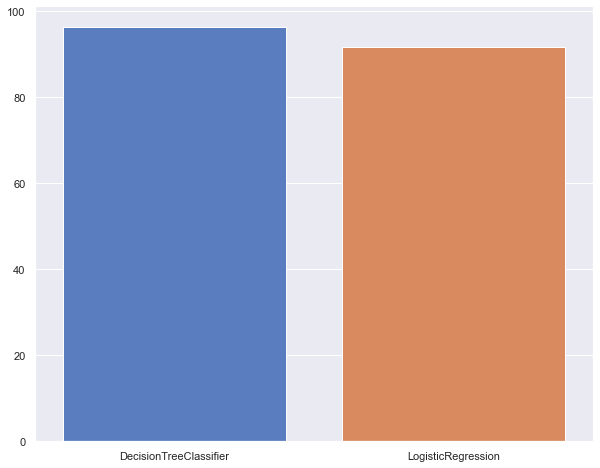

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
algo_name = list(scores_dict.keys())
accuracy_list = list(scores_dict.values())

sns.set(rc={'figure.figsize':(12.5,6.5)})
with sns.color_palette('muted'):
    sns.barplot(x=algo_name,y=accuracy_list)